In [14]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect('../Data/WaiyatDataScience.db')
query = 'select * from LovelyRunnerActrorsData '

actorsdata = pd.read_sql_query(query, conn)

conn.close()
actorsdata.head()

,ID,months,ByeonWooSeok_fans,KimHyeYoon_fans,ByeonWooSeok_VarietyShows,KimHyeYoon_VarietyShows
0,1,May,500000,400000,You Quiz on the Block,Salon Drip 2
1,2,June,650000,550000,Interview-based shows,Confirmed pictorials
2,3,July,800000,700000,Global fan meetings,Multiple magazine appearances
3,4,August,1000000,850000,Media interviews,Interviews
4,5,September,1200000,1000000,Press events,Variety and interview shows


In [15]:
MrDieAlot = actorsdata[['months','ByeonWooSeok_fans']]
MrsTimeTravel = actorsdata[['months','KimHyeYoon_fans']]
print(MrDieAlot)
print("--------------------------------")
print(MrsTimeTravel)

      months  ByeonWooSeok_fans
0        May             500000
1       June             650000
2       July             800000
3     August            1000000
4  September            1200000
--------------------------------
      months  KimHyeYoon_fans
0        May           400000
1       June           550000
2       July           700000
3     August           850000
4  September          1000000


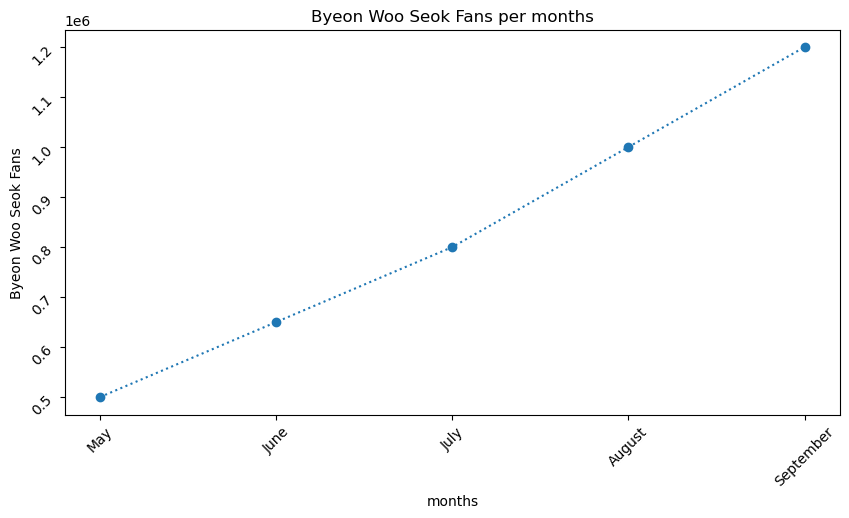

In [16]:
plt.figure(figsize=(10,5))
plt.plot(actorsdata['months'],actorsdata['ByeonWooSeok_fans'], marker = 'o', linestyle=':')
plt.xlabel('months')
plt.ylabel('Byeon Woo Seok Fans')
plt.title('Byeon Woo Seok Fans per months')
plt.xticks(rotation= 45)
plt.yticks( rotation = 45)
plt.show()

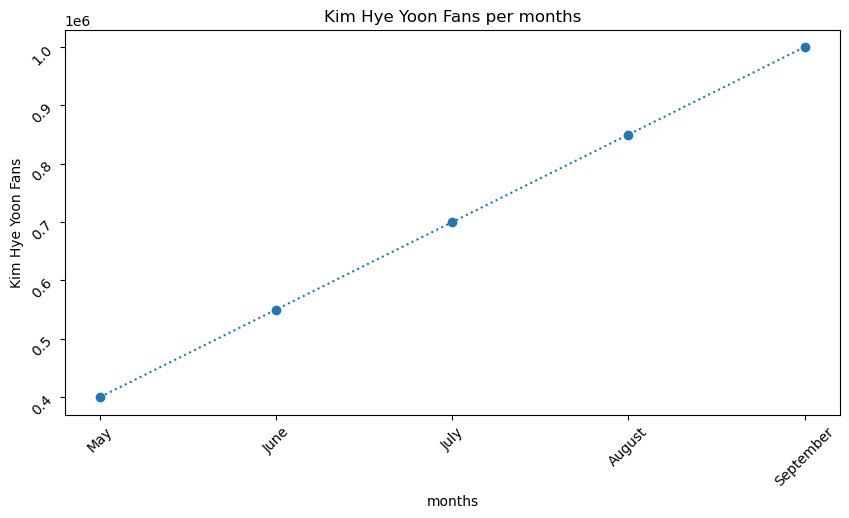

In [17]:
plt.figure(figsize=(10,5))
plt.plot(actorsdata['months'],actorsdata['KimHyeYoon_fans'], marker = 'o', linestyle=':')
plt.xlabel('months')
plt.ylabel('Kim Hye Yoon Fans')
plt.title('Kim Hye Yoon Fans per months')
plt.xticks(rotation= 45)
plt.yticks( rotation = 45)
plt.show()

In [26]:
# Changing the Month to Label Numeric Encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
actorsdata['months_numeric'] = label_encoder.fit_transform(actorsdata['months'])
print(actorsdata[['months', 'months_numeric']])

      months  months_numeric
0        May               3
1       June               2
2       July               1
3     August               0
4  September               4


model predict Byeon Woo Seok : [ 500000  650000  800000 1000000 1200000]


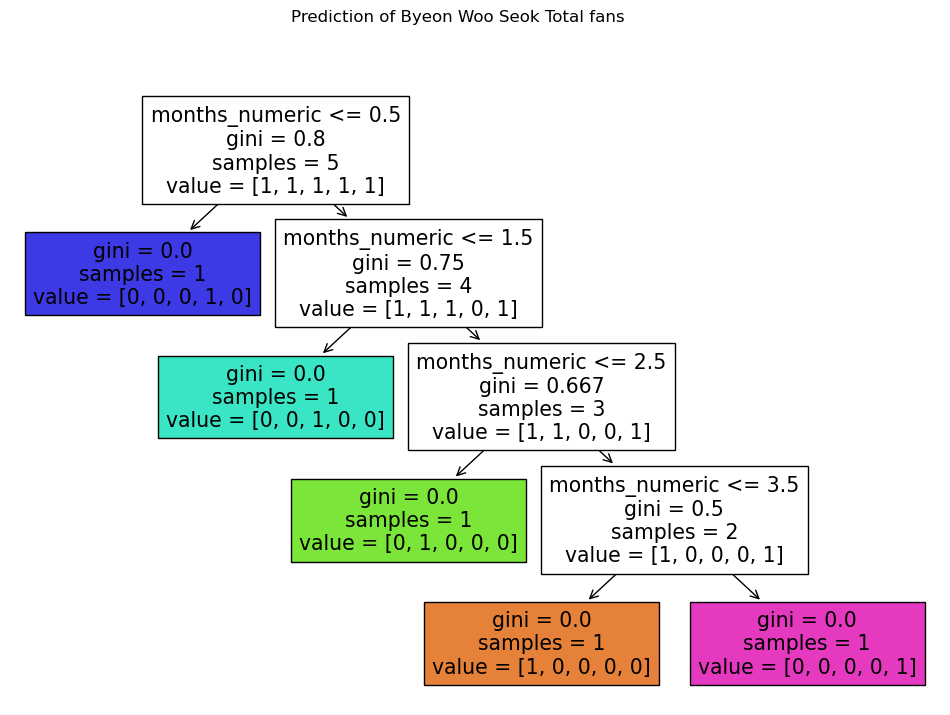

In [29]:
# Data prediction Byeon Woo Seok

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

x = actorsdata[['months_numeric']] 
y = actorsdata['ByeonWooSeok_fans'] 

Model = DecisionTreeClassifier()
Model.fit(x,y)
predict_ByeonWooSeok_fans = Model.predict(x)
print('model predict Byeon Woo Seok : ' + str(predict_ByeonWooSeok_fans))


plt.figure(figsize=(12,8))
plt.suptitle("Prediction of Byeon Woo Seok Total fans ")  # since it is the tree the suptitle it design for a whole figure
plot_tree(Model, feature_names=['months_numeric'], filled=True)
plt.show()

model predict Kim Hye Yoon: [ 400000  550000  700000  850000 1000000]


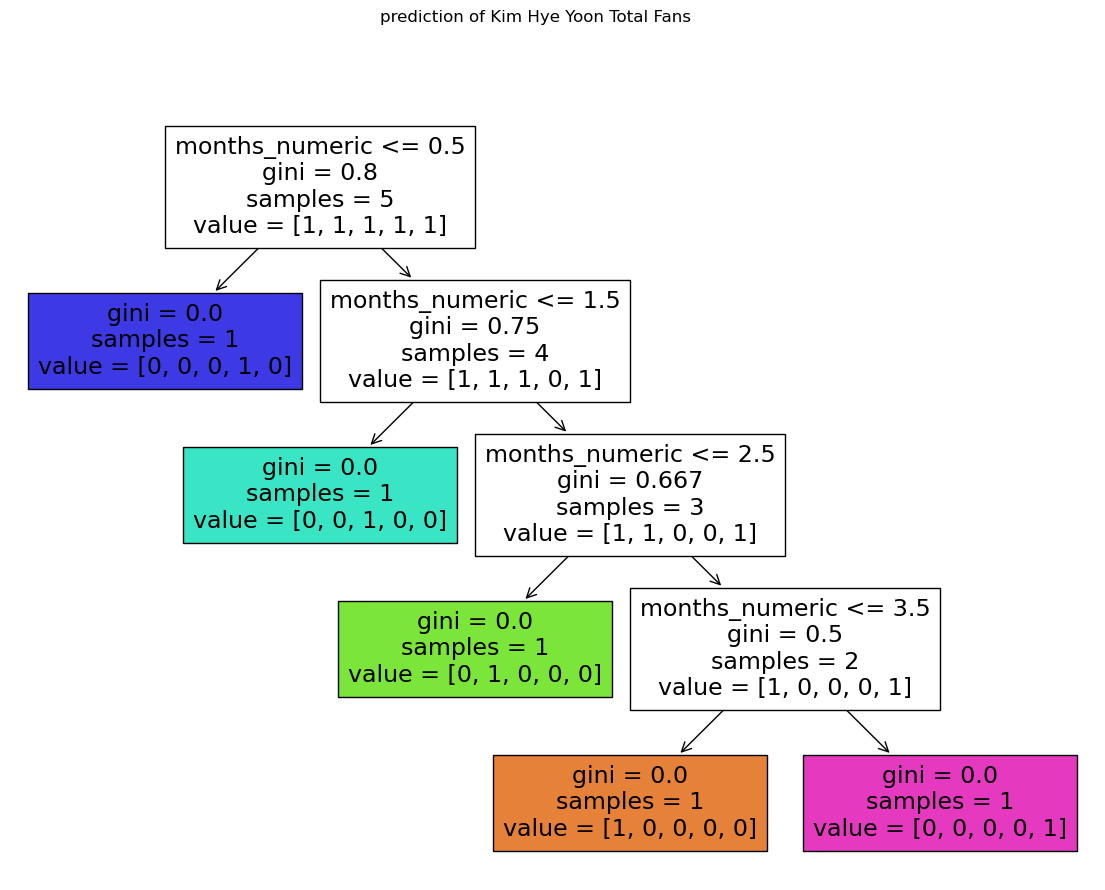

In [32]:
# Data prediction Kim Hye Yoon

# I already have nummeric month in the previous cell 
z = actorsdata[['KimHyeYoon_fans']]
Models = DecisionTreeClassifier()
Models.fit(x,z)
predict_KimHyeYoon_fans = Models.predict(x)
print('model predict Kim Hye Yoon: ' + str(predict_KimHyeYoon_fans))

plt.figure(figsize=(14,10))
plt.suptitle('prediction of Kim Hye Yoon Total Fans')
plot_tree(Models, feature_names=['months_numeric'],filled=True)
plt.show()

Mean Squared Error: 18500000000.0


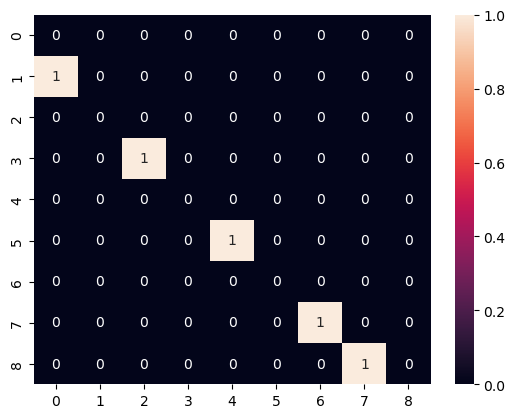

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error

matrix = confusion_matrix(predict_ByeonWooSeok_fans,predict_KimHyeYoon_fans)
plot = sns.heatmap(matrix, annot=True)

mse = mean_squared_error(predict_ByeonWooSeok_fans, predict_KimHyeYoon_fans)
print(f"Mean Squared Error: {mse}")

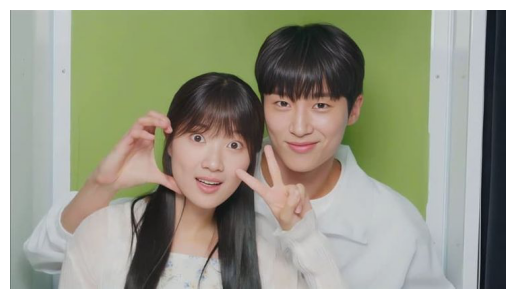

In [35]:
from PIL import Image

image = Image.open('../img/1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()